In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('menu.csv')

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


In [ ]:
df.shape

(260, 24)

In [ ]:
#X = df[['Total Fat','Cholesterol','Sodium']]
X = df[['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']]
y = df['Category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,7), max_iter=700)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_train, predictions)
print(classification_report(y_train,predictions))

                    precision    recall  f1-score   support

       Beef & Pork       1.00      0.64      0.78        11
         Beverages       0.65      0.50      0.56        22
         Breakfast       0.88      0.91      0.90        33
    Chicken & Fish       0.75      0.95      0.84        22
      Coffee & Tea       0.78      0.92      0.84        79
          Desserts       1.00      0.14      0.25         7
            Salads       1.00      1.00      1.00         4
Smoothies & Shakes       0.94      0.85      0.89        20
    Snacks & Sides       0.60      0.30      0.40        10

          accuracy                           0.80       208
         macro avg       0.84      0.69      0.72       208
      weighted avg       0.81      0.80      0.79       208



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7  0  4  0  0  0  0  0  0]
 [ 0 11  0  0 11  0  0  0  0]
 [ 0  0 30  2  0  0  0  0  1]
 [ 0  0  0 21  0  0  0  0  1]
 [ 0  6  0  0 73  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  3  0  0 17  0]
 [ 0  0  0  5  1  0  0  1  3]]


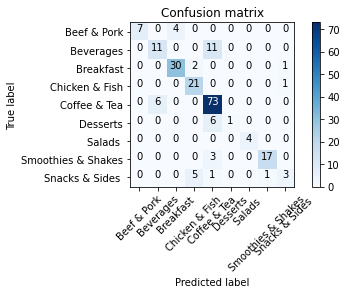

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Beef & Pork',' Beverages','Breakfast','Chicken & Fish','Coffee & Tea','Desserts','Salads ','Smoothies & Shakes','Snacks & Sides '],normalize= False,  title='Confusion matrix')

[[ 1  0  2  1  0  0  0  0]
 [ 0  2  0  0  3  0  0  0]
 [ 0  0  8  1  0  0  0  0]
 [ 0  0  1  4  0  0  0  0]
 [ 0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  2  0  6  0]
 [ 0  2  0  1  0  0  0  0]]
                    precision    recall  f1-score   support

       Beef & Pork       1.00      0.25      0.40         4
         Beverages       0.40      0.40      0.40         5
         Breakfast       0.73      0.89      0.80         9
    Chicken & Fish       0.57      0.80      0.67         5
      Coffee & Tea       0.75      0.94      0.83        16
            Salads       1.00      1.00      1.00         2
Smoothies & Shakes       1.00      0.75      0.86         8
    Snacks & Sides       0.00      0.00      0.00         3

          accuracy                           0.73        52
         macro avg       0.68      0.63      0.62        52
      weighted avg       0.72      0.73      0.70        52

Confusion matrix, without normalization
[[ 1  0  2  1  0  0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


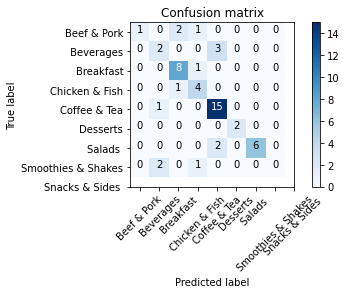

In [ ]:
predictions= mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Beef & Pork',' Beverages','Breakfast','Chicken & Fish','Coffee & Tea','Desserts','Salads ','Smoothies & Shakes','Snacks & Sides '],normalize= False,  title='Confusion matrix')